In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv')

In [38]:
df.head()

,Category,Message,char_count,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [5]:
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates(inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
df['Category'] = le.fit_transform(df['Category'])

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

In [29]:
df['char_count'] = df['Message'].apply(len)

In [36]:
df['word_count'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [37]:
df['sent_count'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [39]:
df.head()

,Category,Message,char_count,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
df[['char_count', 'word_count', 'sent_count']].describe()

,char_count,word_count,sent_count
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
df[df['Category'] == 0][['char_count', 'word_count', 'sent_count']].describe()

,char_count,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


from matplotlib import pyplot as plt
_df_0['char_count'].plot(kind='hist', bins=20, title='char_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['word_count'].plot(kind='hist', bins=20, title='word_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['sent_count'].plot(kind='hist', bins=20, title='sent_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='char_count', y='word_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='word_count', y='sent_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['char_count'].plot(kind='line', figsize=(8, 4), title='char_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['word_count'].plot(kind='line', figsize=(8, 4), title='word_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['sent_count'].plot(kind='line', figsize=(8, 4), title='sent_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [46]:
import seaborn as sns

<Axes: xlabel='char_count', ylabel='Count'>

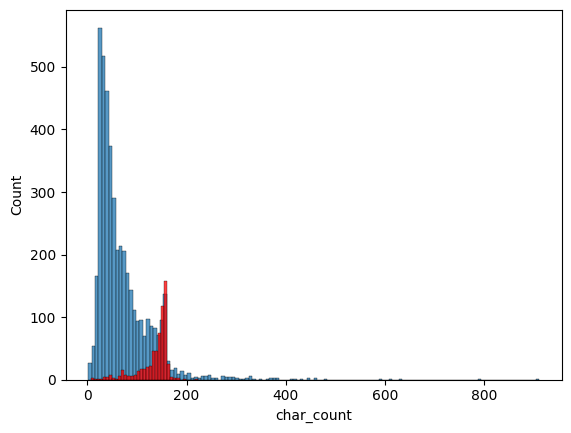

In [48]:
sns.histplot(df[df['Category'] == 0]['char_count'])
sns.histplot(df[df['Category'] == 1]['char_count'], color='red')